## Procedure

1. Clean and transform data
2. **Exploratory Data Analysis (EDA)**
3. Handle imbalanced classes
4. Modeling & evaluation
5. Conclusion
6. Clean code with classes & functions

## Exploratory Data Analysis
As a data scientist, you have to make a lot of decisions that ultimately affect the performance of your models. To do your best in making responsible, informed decisions, you have to learn about your data's characteristics and distributions.

In [2]:
import pandas as pd
import numpy as np
from sklearn.externals import joblib
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# original_data = pd.read_csv('../work/data/device_failure.csv', engine='python')
non_transformed_features = joblib.load('../work/data/non_transformed_features')
transformed_features = joblib.load('../work/data/transformed_features')
target = joblib.load('../work/data/target')

### Explore distribution

In [3]:
non_transformed_features.describe()

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,Dayofweek
count,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,1.223881e+08,159.484762,9.940455,1.741120,14.222669,260172.657726,0.292528,0.292528,12.451524,3.012450
std,7.045933e+07,2179.657730,185.747321,22.908507,15.943028,99151.078547,7.436924,7.436924,191.425623,2.001234
min,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000
25%,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000,1.000000
50%,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000,3.000000
75%,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000,5.000000
max,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000,6.000000


In [4]:
print(non_transformed_features.shape)
print(target.shape)

(124494, 11)
(124494,)


In [5]:
non_transformed_data = pd.concat([non_transformed_features,target], axis=1)
non_transformed_data.head(2)

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,Dayofweek,device,failure
0,215630672,56,0,52,6,407438,0,0,7,3,S1F01085,0
1,61370680,0,3,0,6,403174,0,0,0,3,S1F0166B,0


In [6]:
pd.crosstab(non_transformed_data['Dayofweek'], non_transformed_data['failure'], normalize='index')

failure,0,1
Dayofweek,,
0,0.998490,0.001510
1,0.998973,0.001027
2,0.999125,0.000875
3,0.998787,0.001213
4,0.999335,0.000665
5,0.999553,0.000447
6,0.999776,0.000224


(0, 5000)

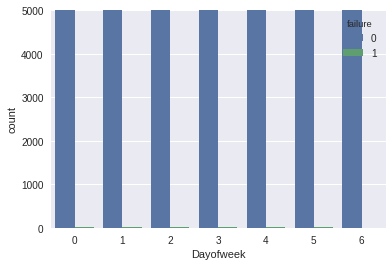

In [7]:
sns.countplot(x='Dayofweek', hue='failure', data=non_transformed_data)
plt.ylim(0,5000)

(0, 100)

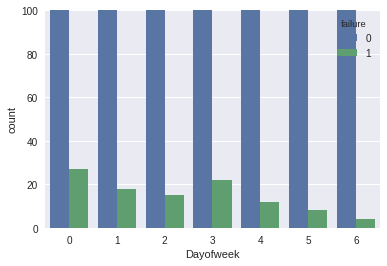

In [8]:
# Zoom in

sns.countplot(x='Dayofweek', hue='failure', data=non_transformed_data)
plt.ylim(0,100)

In [9]:
by_device = pd.crosstab(non_transformed_data['device'], non_transformed_data['failure'], normalize='index')
by_device.head(10)

failure,0,1
device,,
S1F01085,1.000000,0.000000
S1F013BB,1.000000,0.000000
S1F0166B,1.000000,0.000000
S1F01E6Y,1.000000,0.000000
S1F01JE0,1.000000,0.000000
S1F01R2B,1.000000,0.000000
S1F01TD5,1.000000,0.000000
S1F01XDJ,1.000000,0.000000
S1F023H2,0.947368,0.052632


In [10]:
by_device.rename(columns={0:'N', 1:'Y'}, inplace=True)
by_device = by_device.sort_values(by='Y', ascending=False)
by_device.reset_index(inplace=True)
top_10 = by_device.head(10)
top_10

failure,device,N,Y
0,S1F0RRB1,0.800000,0.200000
1,S1F10E6M,0.857143,0.142857
2,S1F11MB0,0.857143,0.142857
3,S1F0CTDN,0.857143,0.142857
4,Z1F1AG5N,0.888889,0.111111
5,W1F0PNA5,0.888889,0.111111
6,W1F13SRV,0.923077,0.076923
7,W1F03DP4,0.928571,0.071429
8,W1F1230J,0.928571,0.071429
9,W1F0T034,0.941176,0.058824


In [11]:
top_10['device'].unique()

array(['S1F0RRB1', 'S1F10E6M', 'S1F11MB0', 'S1F0CTDN', 'Z1F1AG5N',
       'W1F0PNA5', 'W1F13SRV', 'W1F03DP4', 'W1F1230J', 'W1F0T034'], dtype=object)

In [12]:
top_10 = non_transformed_data[non_transformed_data['device'].isin(['S1F0RRB1', 'S1F10E6M', 'S1F11MB0', 'S1F0CTDN', 'Z1F1AG5N',
       'W1F0PNA5', 'W1F13SRV', 'W1F03DP4', 'W1F1230J', 'W1F0T034'])]

In [13]:
top_10_new = top_10.sort_values(by='failure')

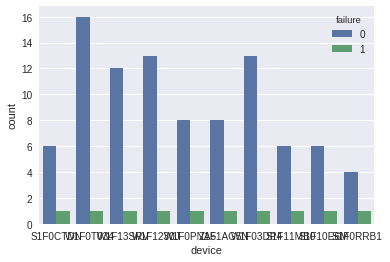

In [14]:
sns.countplot(x='device', hue='failure', data=top_10_new)
# plt.ylim(0,5)

At first glance, it seems that some devices fail more often than others, but a deeper look shows that the top 10 devices that fail only have one count, are just considered the "top 10" because of its non-fail logs. Thus, we can conclude that `device` is not an important variable and can be dropped (it's not worth it to keep it and one-hot-encode it, which would blow up our dataset). 

In [18]:
non_transformed_features.drop('device', axis=1, inplace=True)
joblib.dump(non_transformed_features, '../work/data/non_transformed_features')

['../work/data/non_transformed_features']

### Boxplots

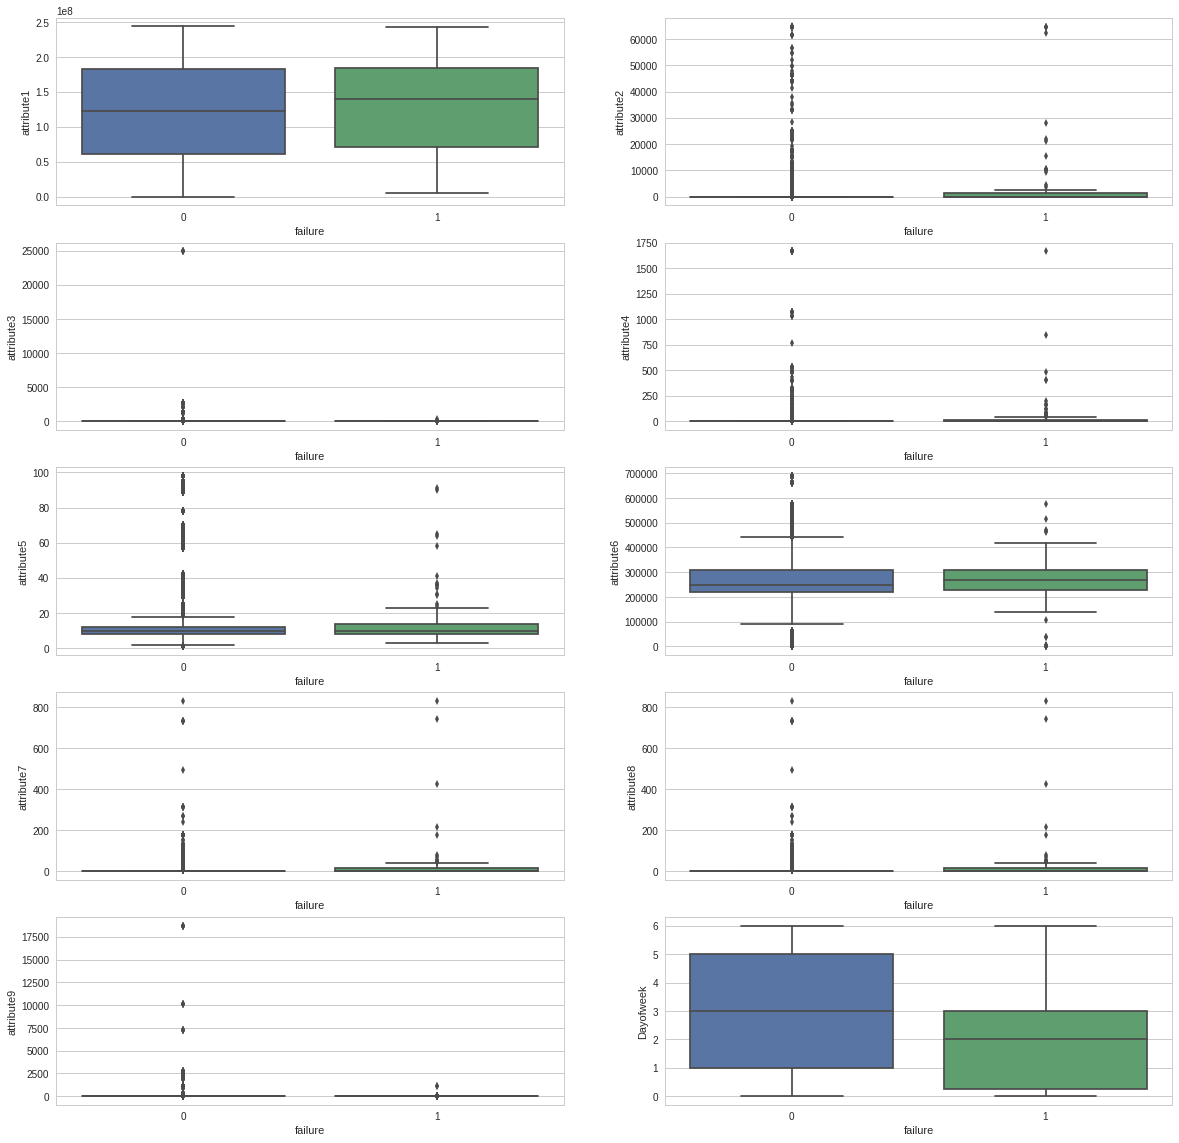

In [71]:
# The ones with the greatest discrepancy in distribution signal 
# their importance for failure prediction

fig = plt.figure(figsize=(20,20))

for i, col in enumerate(non_transformed_features.columns):
    fig.add_subplot(5,2,1+i)
    sns.set(style="whitegrid")
    ax = sns.boxplot(x=target, y=non_transformed_features[col])

### Correlation matrix

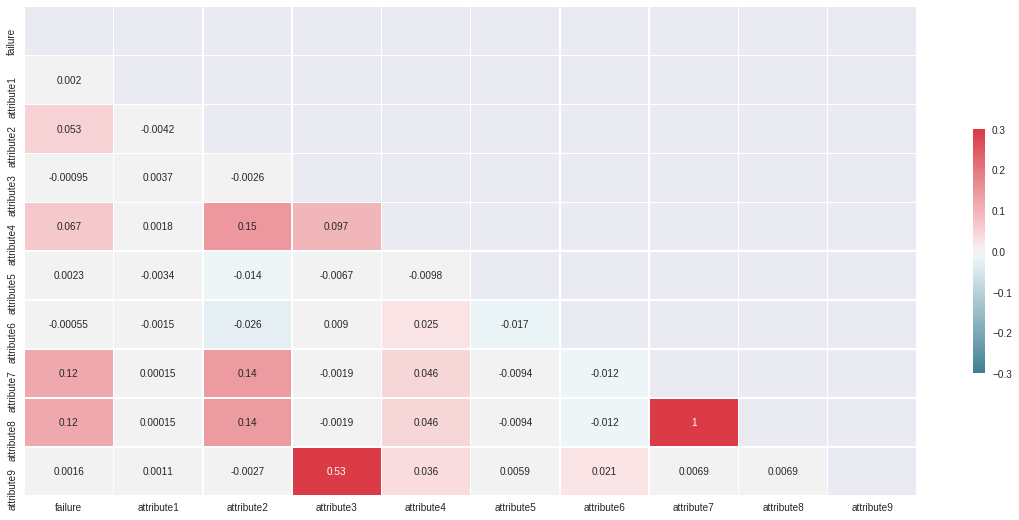

In [6]:
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax,
            annot=True)

### Scatter plot

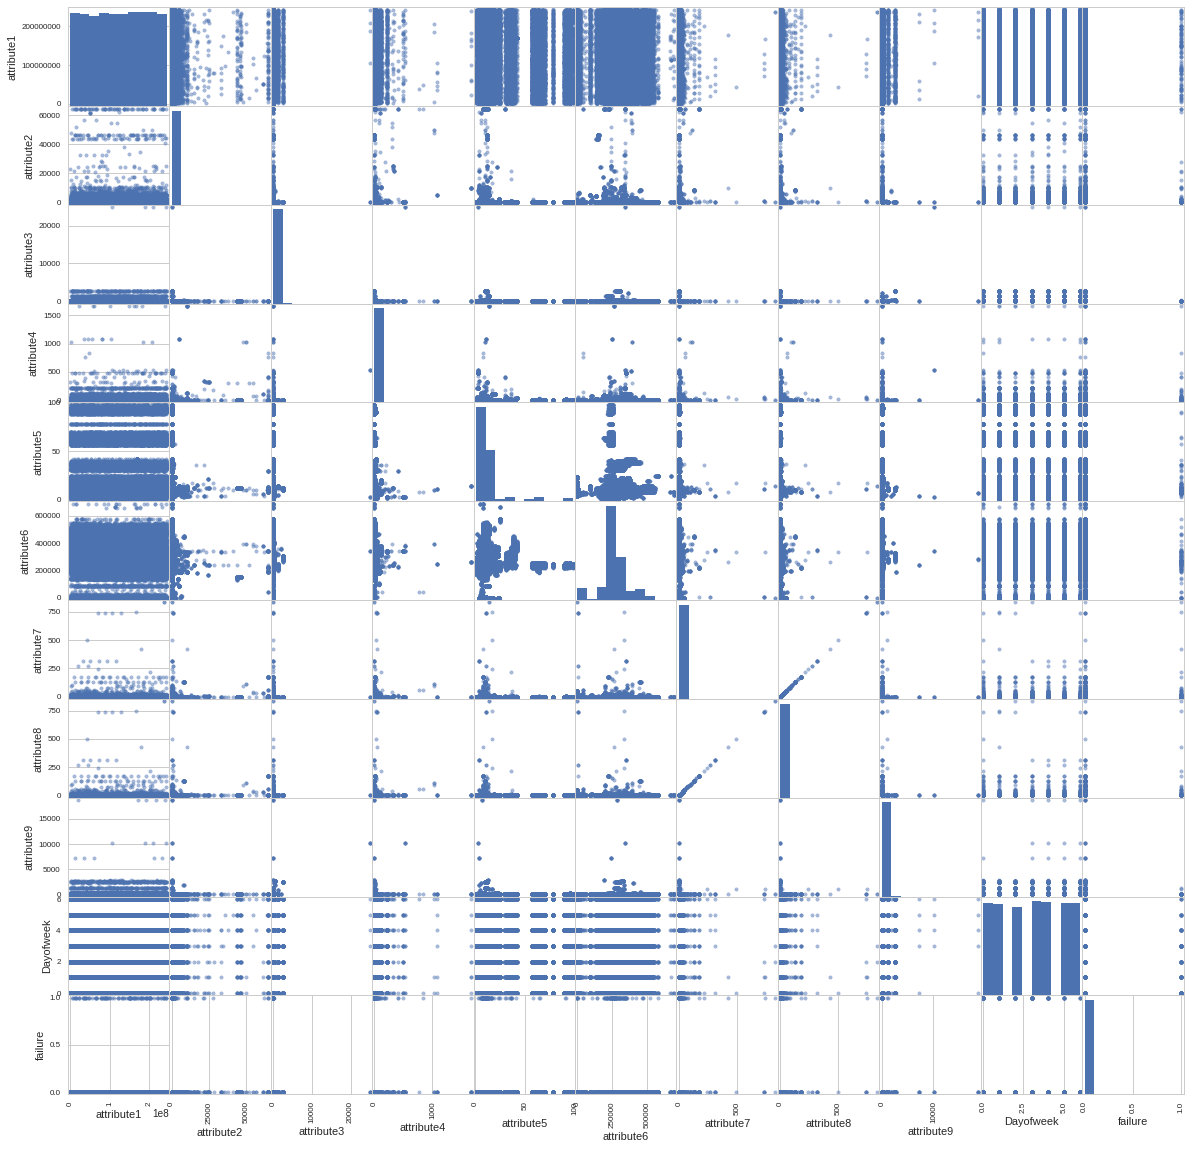

In [115]:
pd.scatter_matrix(non_transformed_data, alpha=.5, figsize=(20,20))
plt.show()

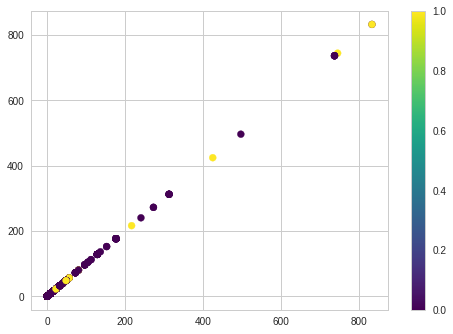

In [118]:
plt.scatter(non_transformed_features['attribute7'], non_transformed_features['attribute8'], c=target, cmap='viridis')
plt.colorbar()

## Feature Selection

### Use Random Forest to find important features
Random Forest randomly generates a bunch of decision trees and takes turns leaving out each varibale in fitting the model. This way, you can calsulcate how much better or worse a model does when you leave one variable out. 

In [25]:
features = non_transformed_features.columns.values

rfc = RandomForestClassifier()
rfc.fit(non_transformed_features, target)

print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), features), reverse=True))

Features sorted by their score:
[(0.29409999999999997, 'attribute1'), (0.23549999999999999, 'attribute6'), (0.1167, 'attribute2'), (0.099000000000000005, 'attribute4'), (0.0809, 'attribute5'), (0.0717, 'Dayofweek'), (0.035000000000000003, 'attribute8'), (0.032599999999999997, 'attribute7'), (0.028400000000000002, 'attribute9'), (0.0061999999999999998, 'attribute3')]


## PCA
Use the first two principal components to visualize the data

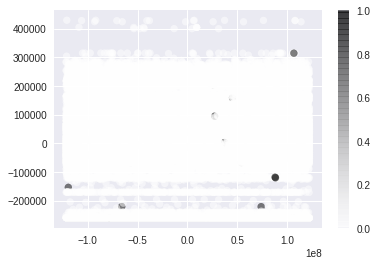

In [33]:
# Try PCA on non-transformed data 

pca = PCA()
features_pca = pca.fit_transform(non_transformed_features)
plt.scatter(features_pca[:,0], features_pca[:,1], c=target, alpha=.5)
plt.colorbar()

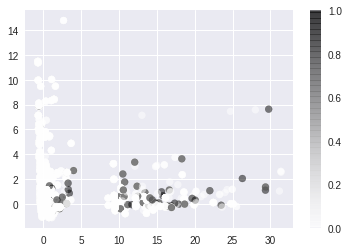

In [35]:
# Try PCA on transformed data

pca = PCA()
pca_features = pca.fit_transform(transformed_features)
plt.scatter(pca_features[:,0], pca_features[:,1], c=target, alpha=.5)
plt.colorbar()

In [36]:
pca.explained_variance_ratio_[:5]

array([ 0.13258631,  0.10384451,  0.07315312,  0.07306768,  0.07299079])

In [37]:
# 11 components can account for 90% of the variance

np.where(np.cumsum(pca.explained_variance_ratio_) > .9)[0][0]

11

In [38]:
len(pca.explained_variance_ratio_)

16

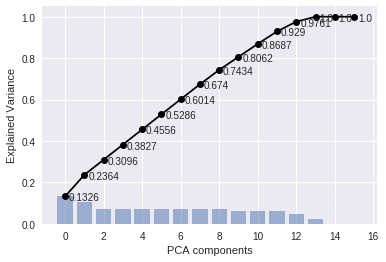

In [39]:
# create an x-axis variable for each pca component
x = np.arange(16)

# plot the cumulative variance
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), '-o', color='black')

# plot the components' variance
plt.bar(x, pca.explained_variance_ratio_, align='center', alpha=0.5)

# plot styling
for i,j in zip(x, np.cumsum(pca.explained_variance_ratio_)):
    plt.annotate(str(j.round(4)),xy=(i+.2,j-.02))
plt.xlabel('PCA components')
plt.ylabel('Explained Variance')
plt.show()

In [50]:
non_transformed_features.columns

Index(['attribute1', 'attribute2', 'attribute3', 'attribute4', 'attribute5',
       'attribute6', 'attribute7', 'attribute8', 'attribute9', 'Dayofweek'],
      dtype='object')